## Install Faker

In [ ]:
!pip install Faker

## Create a Sample Dataframe

In [ ]:
import pandas as pd
from faker import Faker
import numpy as np

# Initialize Faker
fake = Faker()
Faker.seed(27) # Set seed for reproducibility

# Create a DataFrame for employees
num_employees = 200
departments = ['Engineering', 'Finance', 'HR', 'Marketing', 'Sales', 'IT']

years_with_company = np.random.randint(1, 10, size=num_employees)
salary = 40000 + 2000 * years_with_company * np.random.randn()

employee_data = {
    'EmployeeID': np.arange(1, num_employees + 1),
    'FirstName': [fake.first_name() for _ in range(num_employees)],
    'LastName': [fake.last_name() for _ in range(num_employees)],
    'Age': np.random.randint(22, 60, size=num_employees),
    'Department': [fake.random_element(departments) for _ in range(num_employees)],
    'Salary': np.round(salary),
    'YearsWithCompany': years_with_company
}

df_employees = pd.DataFrame(employee_data)

# Display the head of the DataFrame
df_employees.head(10)


,EmployeeID,FirstName,LastName,Age,Department,Salary,YearsWithCompany
0,1,Deborah,Adams,48,Sales,54769.0,7
1,2,Jacqueline,Green,49,HR,56879.0,8
2,3,Susan,Whitaker,36,IT,54769.0,7
3,4,James,Rodriguez,32,Engineering,44220.0,2
4,5,Cameron,Murray,49,Sales,42110.0,1
5,6,Madison,Williams,50,HR,48439.0,4
6,7,Mason,Brown,27,Sales,54769.0,7
7,8,Nathan,Allison,49,IT,42110.0,1
8,9,Lisa,Mueller,32,IT,50549.0,5
9,10,Isaac,Spears,37,HR,42110.0,1


## Scatter plot: Age vs. Salary

<Axes: title={'center': 'Scatter Plot: Age vs Salary'}, xlabel='Age', ylabel='Salary'>

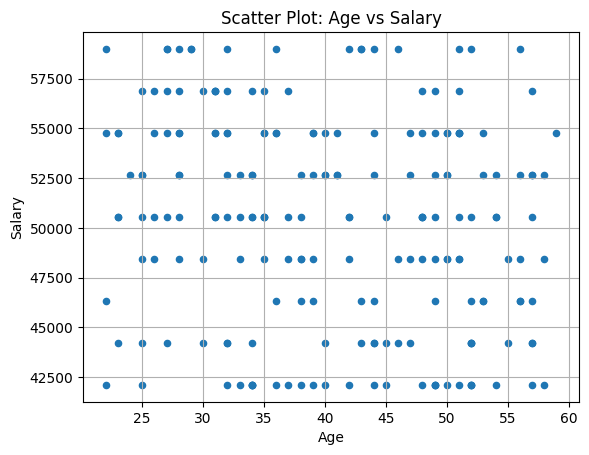

In [ ]:
# Scatter Plot: Age vs Salary

df_employees.plot.scatter(x='Age', y='Salary', title='Scatter Plot: Age vs Salary', xlabel='Age', ylabel='Salary', grid=True)

## Line Plot: Average Salary Trend Over Years of Experience

<Axes: title={'center': 'Average Salary Trend Over Years of Experience'}, xlabel='Years With Company', ylabel='Average Salary'>

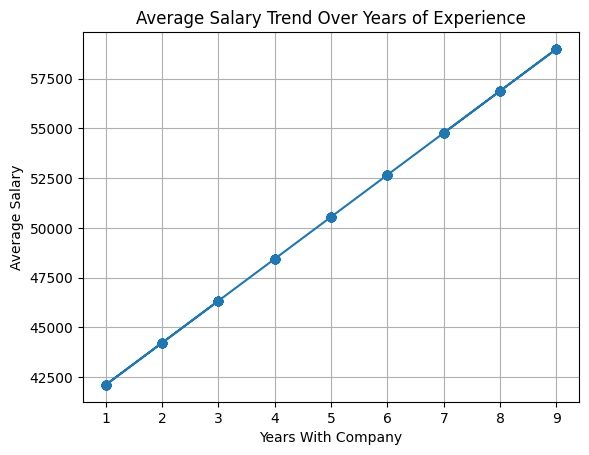

In [ ]:
# Line Plot: Average Salary Trend Over Years of Experience
average_salary_by_experience = df_employees.groupby('YearsWithCompany')['Salary'].mean()
df_employees['AverageSalaryByExperience'] = df_employees['YearsWithCompany'].map(average_salary_by_experience)

df_employees.plot.line(x='YearsWithCompany', y='AverageSalaryByExperience', marker='o', linestyle='-', title='Average Salary Trend Over Years of Experience', xlabel='Years With Company', ylabel='Average Salary', legend=False, grid=True)


## Histogram: Distribution of Ages

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

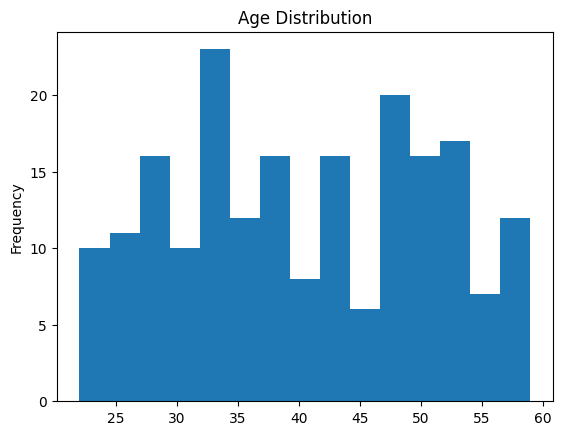

In [ ]:
# Histogram: Distribution of Ages
df_employees['Age'].plot.hist(title='Age Distribution', bins=15)

## Box Plot: Salary Distribution by Department

<Axes: title={'center': 'Salary'}, ylabel='Department'>

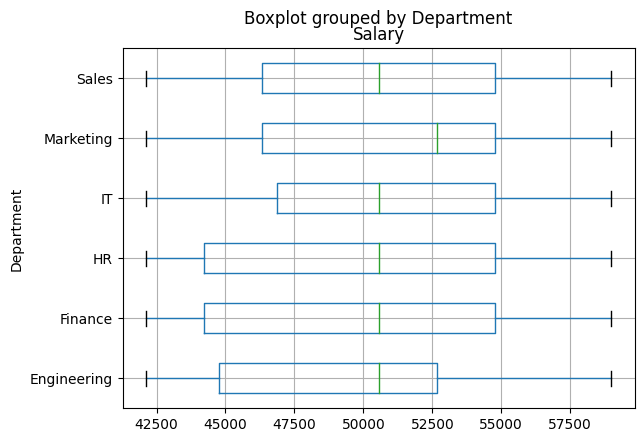

In [ ]:
# Box Plot: Salary distribution by Department
df_employees.boxplot(column='Salary', by='Department', grid=True, vert=False)

## Bar Plot: Department-wise Employee Count

<Axes: title={'center': 'Employee Count by Department'}>

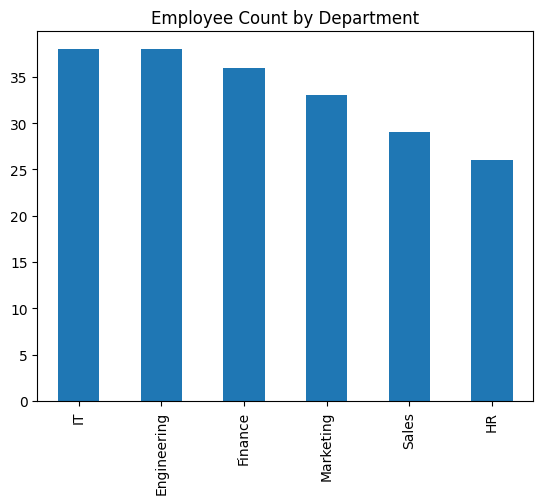

In [ ]:
# Bar Plot: Department-wise employee count
df_employees['Department'].value_counts().plot.bar(title='Employee Count by Department')

## Area Plot: Cumulative Salary Distribution Over Age Groups

<Axes: title={'center': 'Cumulative Salary Distribution Over Age Groups'}, xlabel='Age Group', ylabel='Cumulative Salary'>

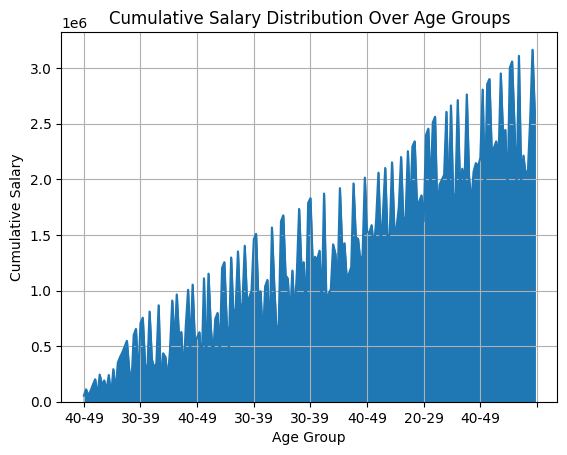

In [ ]:
# Area Plot: Cumulative Salary Distribution Over Age Groups
df_employees['AgeGroup'] = pd.cut(df_employees['Age'], bins=[20, 30, 40, 50, 60], labels=['20-29', '30-39', '40-49', '50-59'])
cumulative_salary_by_age_group = df_employees.groupby('AgeGroup')['Salary'].cumsum()

df_employees['CumulativeSalaryByAgeGroup'] = cumulative_salary_by_age_group

df_employees.plot.area(x='AgeGroup', y='CumulativeSalaryByAgeGroup', title='Cumulative Salary Distribution Over Age Groups', xlabel='Age Group', ylabel='Cumulative Salary', legend=False, grid=True)


## Pie Chart: Department-wise Salary distribution

<Axes: title={'center': 'Department-wise Salary Distribution'}, ylabel='Salary'>

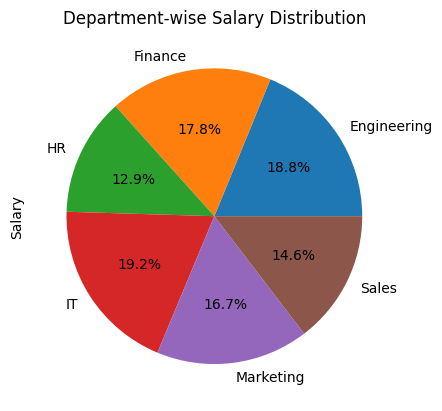

In [ ]:
# Pie Chart: Department-wise Salary distribution
df_employees.groupby('Department')['Salary'].sum().plot.pie(title='Department-wise Salary Distribution', autopct='%1.1f%%')